<h1><h1>
Scikit-learn で住宅価格予測（線形回帰）</h1></h1><br>

売り上げなどの数量（連続値をとる目的変数）を予測するのに役立つのが回帰です。特に目的変数と説明変数の関係をモデル化する一つの方法である線形回帰をScikit-learnライブラリを使って行う方法について説明、実践していきます

今回は、ボストンの住宅価格の予測を行います。

<hr>
<h1>
<span id="scikit-learn-について" class="fragment"></span>Scikit-learn について</h1>

<p>Scikit-learnは、Pythonの機械学習ライブラリの一つです。</p>

<ul>
<li>公式ドキュメント：<a href="http://scikit-learn.org/stable/index.html" class="autolink" rel="nofollow noopener" target="_blank">http://scikit-learn.org/stable/index.html</a>
</li>
</ul>

<hr><h1>
<span id="線形回帰について" class="fragment"></span>線形回帰について</h1>

<p>線形回帰は、連続値をとる目的変数 $y$ と説明変数 $x$（特徴量）の線形関係をモデル化します。線形関係とは、平たく言うと、説明変数が増加（減少）するのに応じて、目的変数も単調に増加（減少）する関係です。説明変数が一つの場合（単回帰と呼ぶ）、目的変数と説明変数の関係をモデル化する線形モデルは以下の式で定義されます。</p>
<br>
<div class="code-frame" data-lang="math"><div class="highlight">$y = w_0 + w_1x$
</div></div>
<br>
<p>ここで、重み $w_0$ は切片、重み $w_1$ は説明変数の係数を表します。線形回帰の目的は、説明変数と目的変数の関係を表現する線形モデルの重みを学習することです。上の式のように、目的変数が説明変数の一次式で表現されるとき、線形回帰は「説明変数と目的変数の散布図において、データの分布を最もよく特徴づける直線を探し出すこと」といえます。</p>

<p>説明変数が複数の場合（重回帰と呼ぶ）、目的変数を説明変数の線形和で表現する線形モデルは以下の式で定義されます。</p>
<br>
<div class="code-frame" data-lang="math"><div class="highlight">$y = w_0x_0 + w_1x_1 + \cdots +w_mx_m = \sum^m_{i=0}w_ix_i
$</div></div>
<br>
<p>ここで、重み $w_0$ は $x_0=1$ として切片を表します。重回帰は、単回帰を複数の説明変数を扱扱えるように一般化したものであり、目的変数と複数の説明変数の関係を表すモデルの重みを学習することが目的です。</p>


<hr><h1>
<span id="線形回帰モデル" class="fragment"></span><a href="#%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB"><i class="fa fa-link"></i></a>線形回帰モデル</h1>

<p>scikit-learnで線形回帰をするには、linear_modelのLinearRegressionモデル（公式ドキュメント：<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" class="autolink" rel="nofollow noopener" target="_blank">http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a> ）を使います。主に利用するメソッドは以下の通りです。</p>

<ul>
<li>fitメソッド：線形モデルの重みを学習</li>
<li>predictメソッド：線形モデルから目的変数を予測</li>
<li>scoreメソッド：決定係数（線形モデルがどの程度目的変数を説明できるか）を出力</li>
</ul>

<p>ここでは、UCI Machine Learning Repository (<a href="http://archive.ics.uci.edu/ml/index.php" class="autolink" rel="nofollow noopener" target="_blank">http://archive.ics.uci.edu/ml/index.php</a>) で公開されている、ボストン市郊外の地域別住宅価格（<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/" class="autolink" rel="nofollow noopener" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/housing/</a> ）を使います。以下のコードでは、scikit-learnライブラリに付属のデータセットを読み込み、PandasのDataFrameに変換しています。</p>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

boston = datasets.load_boston()
X = boston.data
y = boston.target
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_X.columns = boston.feature_names
df_y.columns = ["target"]

df_X.head()

df_y.head()

df = pd.concat([df_X, df_y], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h3>相関係数の確認</h3>
RM（平均部屋数）とtarget（住宅価格）の関係を見てみると、約0.7ほど相関がある、つまり平均部屋数が多いほど住宅価格も高いように見える。
また、RSTAT（低所得者の割合）とtarget（住宅価格）の関係を見てみると、-0.74の相関がある。これにより、低所得者の割合が多いほど住宅価格も低くなることが考えられる。

In [5]:
#相関係数の確認

corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<p>各変数（データ項目）の説明は以下の通りです。</p>
<td align="left">
<table>
<thead>
<tr>
<th style="text-align: left">変数</th>
<th style="text-align: left">説明</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: left">CRIM</td>
<td style="text-align: left">犯罪発生率</td>
</tr>
<tr>
<td style="text-align: left">ZN</td>
<td style="text-align: left">25,000平方フィート以上の住宅区画の割合</td>
</tr>
<tr>
<td style="text-align: left">INDUS</td>
<td style="text-align: left">非小売業種の土地面積の割合</td>
</tr>
<tr>
<td style="text-align: left">CHAS</td>
<td style="text-align: left">チャールズ川沿いかを表すダミー変数</td>
</tr>
<tr>
<td style="text-align: left">NOX</td>
<td style="text-align: left">窒素酸化物の濃度</td>
</tr>
<tr>
<td style="text-align: left">RM</td>
<td style="text-align: left">平均部屋数</td>
</tr>
<tr>
<td style="text-align: left">AGE</td>
<td style="text-align: left">1940年より前に建てられた建物の割合</td>
</tr>
<tr>
<td style="text-align: left">DIS</td>
<td style="text-align: left">5つのボストンの雇用施設への重み付き距離</td>
</tr>
<tr>
<td style="text-align: left">RAD</td>
<td style="text-align: left">高速道路へのアクセスのしやすさ</td>
</tr>
<tr>
<td style="text-align: left">TAX</td>
<td style="text-align: left">10,000ドルあたりの不動産税率</td>
</tr>
<tr>
<td style="text-align: left">PTRATIO</td>
<td style="text-align: left">生徒と教師の割合</td>
</tr>
<tr>
<td style="text-align: left">B</td>
<td style="text-align: left">黒人の割合</td>
</tr>
<tr>
<td style="text-align: left">LSTAT</td>
<td style="text-align: left">低所得者の割合</td>
</tr>
<tr>
<td style="text-align: left">target</td>
<td style="text-align: left">住宅価格の中央値（1,000単位）</td>
</tr>
</tbody>
</table>
</td>
<img data-v-fa2b8430="" src="https://aiacademy.jp/assets/upload/chapter_000092_D3ca5tgPVmAV.png">

<hr><h1>
<span id="線形回帰(単回帰)モデルの構築" class="fragment"></span>線形回帰(単回帰)モデルの構築</h1>

目的変数との相関が大きい説明変数は目的変数の予測に役立つ変数であると言えるので、この"LSTAT"を使って単回帰を行う。この時の相関とは正か負は関係なく相関があれがその変数から予想ができることになる。<br>
また、単回帰とは一つの説明変数から目的変数を予測することを指す。

<h3>・データの確認</h3>

変換前のデータ型は <class 'pandas.core.series.Series'>
変換前の配列の大きさは (506,)
変換後のデータ型は <class 'numpy.ndarray'>
変換後の配列の大きさは (506, 1)


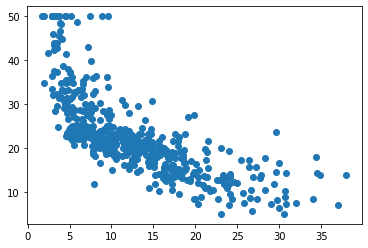

In [19]:
#　LSTSTデータの確認
lstat = df_X.loc[:,"LSTAT"]

print("変換前のデータ型は", type(lstat))
print("変換前の配列の大きさは", lstat.shape)
lstat = lstat.values #.valuesはメソッド（関数）ではなく、属性（プロパティ）の1種で、()は不要です。属性には他にも.indexや.columnsなどがあります。
lstat = lstat.reshape(-1,1)
print("変換後のデータ型は", type(lstat))
print("変換後の配列の大きさは", lstat.shape)

plt.scatter(lstat, y)
plt.show()

<h3>・単回帰の学習</h3>

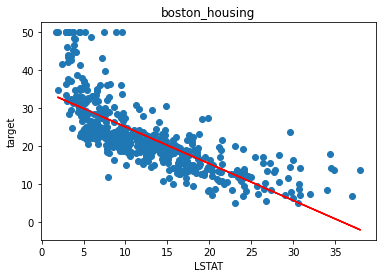

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(lstat, y, test_size=0.3, random_state=0)

# 学習するモデルの選択
lr = LinearRegression() #線形モデル

lr.fit(X_train, y_train) #モデルの学習

#結果の表示
plt.scatter(lstat, y)                       
plt.plot(X_test, lr.predict(X_test), color='red') 
plt.title('boston_housing')     
plt.xlabel('LSTAT')               
plt.ylabel('target')                 
plt.show()


この直線が求まったことにより、LSTATの値がわかればtargetの値を予測することができる

<h3>・データの分割による性能評価と単回帰の評価</h3>
乗平均平方根誤差(Root Mean Squared Error/RMSE)および、決定係数(Coefficient of Determination)という評価指標にて予測モデルの評価を行う。
決定係数は、数式ではR^2(Rの2乗)と表す。

In [21]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 性能評価
from math import sqrt
from sklearn.metrics import mean_squared_error
# 二乗平均平方根誤差(RMSE)を算出
print('RMSE Test :' + str((sqrt(mean_squared_error(y_test, y_test_pred)))))
# 学習用、検証用データに関してR^2を出力 (回帰モデルの場合score()を使うことで決定係数が得られます。)
print('R^2 Train : %.3f, Test : %.3f' % (lr.score(X_train, y_train), lr.score(X_test, y_test)))

RMSE Test :6.310083240714354
R^2 Train : 0.552, Test : 0.522


決定係数は、0~1の範囲の値をとり、1に近いほど理想的なモデルといえます。
またRMSEは、予測と正解の平均的なズレを表しており、平均的に約6.3のズレがあることを示します。

<h3>・残差プロット</h3>
残差プロットは、残差（目的変数の真値と予測値の差分）の分布を可視化したものです。線形モデルが目的変数を完璧に予測できる場合は残差は0となるので、予測精度の良い線形モデルの残差プロットは、0を中心にランダムにばらついたものになります。残差プロットに何かパターンが見られる場合は、線形モデルで説明しきれない情報があることが示唆されます。

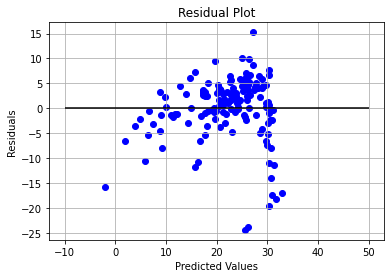

In [23]:
y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測

plt.scatter(y_pred, y_pred - y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()                                               # 図の表示

<hr><h1>
<span id="線形回帰(単回帰)モデルの構築" class="fragment"></span>線形回帰(重回帰)モデルの構築</h1>

複数の説明変数を使い、より複雑な分布にフィットできるモデルを使うことでより精度は上がります。
次はすべての変数を使って住宅価格をいていきます。

<h3>・データの確認</h3>

In [13]:
#　データの確認
print("変換前のデータ型は", type(X))
print("変換前の配列の大きさは", X.shape)


変換前のデータ型は <class 'numpy.ndarray'>
変換前の配列の大きさは (506, 13)


<h3>・重回帰のモデルの学習</h3>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 学習するモデルの選択
lr = LinearRegression() #線形モデル

lr.fit(X_train, y_train) #モデルの学習


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3>・データの分割による性能評価と重回帰の評価</h3>

In [25]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 性能評価
from math import sqrt
from sklearn.metrics import mean_squared_error
# 二乗平均平方根誤差(RMSE)を算出
print('RMSE Test :' + str((sqrt(mean_squared_error(y_test, y_test_pred)))))
# 学習用、検証用データに関してR^2を出力 (回帰モデルの場合score()を使うことで決定係数が得られます。)
print('R^2 Train : %.3f, Test : %.3f' % (lr.score(X_train, y_train), lr.score(X_test, y_test)))

RMSE Test :5.214975145375423
R^2 Train : 0.765, Test : 0.673


<h3>・残差プロット</h3>

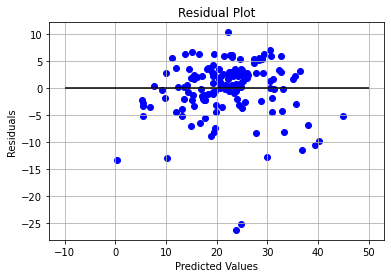

In [26]:
y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測

plt.scatter(y_pred, y_pred - y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()                                               # 図の表示

単回帰に比べて、重回帰は精度が上がっているのが分かる<br>

ただ、重回帰は予測するために必要なデータが増えるので、説明変数が膨大な場合、使いずらかったりする。
また、データによっては学習の妨げになることがあるので、重回帰分析の際は、説明変数の組み合わせの最適化をする必要がある。